In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
A=pd.read_csv('Concrete_Data.csv')
A.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
A.columns=['CC','BFS','FA','WC','SPC','CA','FAC','Age','CCS']

In [5]:
A.shape

(1030, 9)

In [6]:
A.corr()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
CC,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WC,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SPC,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
CC     1030 non-null float64
BFS    1030 non-null float64
FA     1030 non-null float64
WC     1030 non-null float64
SPC    1030 non-null float64
CA     1030 non-null float64
FAC    1030 non-null float64
Age    1030 non-null int64
CCS    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


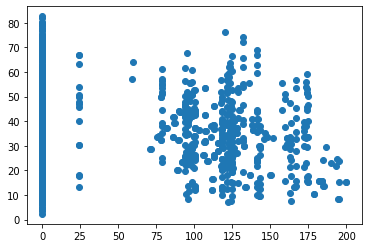

In [8]:
plt.scatter(A['FA'],A['CCS'])

In [9]:
A.corr()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
CC,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WC,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SPC,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [10]:
A.describe()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
X=A.drop('CCS',axis=1)
Y=A[['CCS']]

In [12]:
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_train=X_std[:1000,:]
Y_train=Y[:1000]
Y_true=Y[1000:]
X_std.shape,Y.shape,Y_true.shape,Y_train.shape


((1030, 8), (1030, 1), (30, 1), (1000, 1))

In [13]:
X_prod=X_std[1000:,:]
X_prod.shape

(30, 8)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor



In [15]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [16]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=9,weights='distance')
DT=DecisionTreeRegressor()
RF=RandomForestRegressor(n_estimators=10)
Bagged=BaggingRegressor(n_estimators=50)
AdaBoost=AdaBoostRegressor(n_estimators=50)
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=100)
GBoost=GradientBoostingRegressor(n_estimators=920)
stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('Bagged', Bagged)])

In [17]:
models = []
models.append(('MVLR', LR))
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RandomForest',RF))
models.append(('BaggedRegressor',Bagged))
models.append(('AdaBoostRegressor',AdaBoost))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoostRegressor',GBoost))
models.append(('VotingRegressor',stacked))

MVLR: 10.501989 (0.246847)
KNNRegressor: 7.875823 (0.703701)
DT_Regressor: 6.602479 (0.494672)
RandomForest: 5.247649 (0.442341)
BaggedRegressor: 4.949214 (0.373856)
AdaBoostRegressor: 7.630025 (0.445773)
AdaBoostRF: 5.033300 (0.374670)
GradientBoostRegressor: 4.061217 (0.471939)
VotingRegressor: 4.342767 (0.384031)


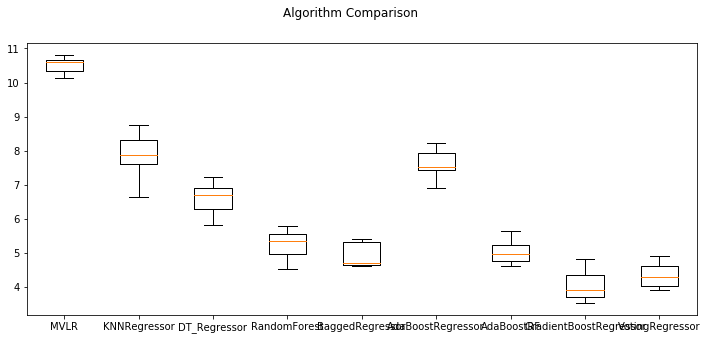

In [29]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=7,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
GBoost.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=920,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
y_pred=GBoost.predict(X_prod)

In [21]:
y_pred[:5]

array([44.03340168, 52.42828403, 54.0497175 , 64.44458932, 54.22902948])

In [22]:
Y_true[:5]

,CCS
1000,44.61
1001,53.52
1002,57.22
1003,65.91
1004,52.83


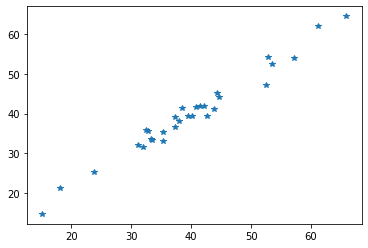

In [23]:
plt.plot(Y_true,y_pred,'*')

In [24]:
Y_pred=pd.DataFrame(y_pred)

In [25]:
idx=np.arange(len(y_pred))
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [26]:
Y_pred.index=idx
Y_true.index=idx

In [27]:
np.corrcoef(Y_true['CCS'],Y_pred[0])

array([[1.       , 0.9858162],
       [0.9858162, 1.       ]])

In [28]:
0.9857227*0.9857227

0.97164924129529